In [145]:
#Import libraries
import pandas as pd #import panda library for dataset manage
import matplotlib.pyplot as plt # library for plot the graph

In [99]:
dataset = pd.read_csv("salary_dataset.csv") #read the dataset from csv and store it in to variable

In [101]:
dataset

,YearofExperience,Salary
0,1.0,25000
1,1.1,25250
2,1.2,25528
3,1.5,25834
4,1.8,26222
5,2.0,26694
6,2.2,27227
7,2.5,27826
8,2.8,28522
9,3.0,29321


In [103]:
#split the dataset into input and output variables
independent = dataset[["YearofExperience"]]
dependent = dataset[["Salary"]]

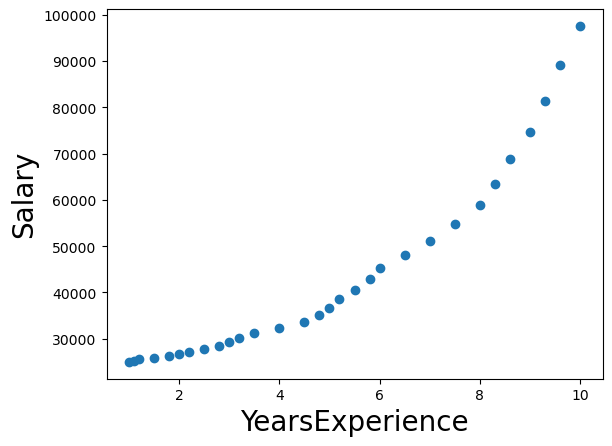

In [105]:
#plot the graph using matplotlib library with input and output data
plt.scatter(independent,dependent)
plt.xlabel('YearsExperience',fontsize=20)
plt.ylabel('Salary',fontsize=20)
plt.show()

In [107]:
#import library from model_selection and split the data into training and test datasets
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(independent, dependent, test_size=0.30, random_state=0)

In [109]:
xTrain

,YearofExperience
22,7.5
5,2.0
16,5.2
8,2.8
14,4.8
23,8.0
20,6.5
1,1.1
29,10.0
6,2.2


In [147]:
#import linear regressino function from linear_model. This is the core model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xTrain, yTrain)

LinearRegression()

In [113]:
#find the value of slope (w)
weight = regressor.coef_
weight

array([[6267.44848629]])

In [115]:
#find the value of bias (b)
bias = regressor.intercept_
bias

array([11816.2243224])

In [117]:
#predict the value with created model by using xTest data
yPred = regressor.predict(xTest)

In [119]:
#import the R2 function from metrics library for finds the variable matrics result (either our model will be fit or not)
from sklearn.metrics import r2_score
rScore = r2_score(yTest, yPred)

In [121]:
rScore

0.8825920065829527

In [123]:
#Pickle library for saving out finalized model
import pickle
fileName = "Finalized_SLR_Model.sav"

In [149]:
#using pickle library save the file with given name
pickle.dump(regressor,open(fileName,'wb'))

In [133]:
#read/open the saved model and predict with new input 
loadedModel = pickle.load(open("Finalized_SLR_Model.sav", 'rb'))
result = loadedModel.predict([[15]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [135]:
result

array([[105827.95161674]])

In [141]:
result = loadedModel.predict([[0]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [143]:
result

array([[11816.2243224]])